In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.sparse.linalg import eigs
from scipy.integrate import simpson
from scipy.integrate import simps
from scipy.integrate import cumulative_trapezoid as c_t
from numpy.polynomial import chebyshev as C

In [2]:
N = 50         # Плотность сетки
x_size = 5      # Размер прямоугольника по оси Х
y_size = 2      # Размер прямоугольника по оси Y

Nx = int(x_size) * N + 1                            # Количество точек по OX
Ny = int(y_size) * N + 1                         # Количество точек по OY
x1 = np.linspace(-x_size / 2, x_size / 2, Nx)   # Разбиение OX
y1 = np.linspace(-y_size / 2, y_size / 2, Ny)   # Разбиение OY
dx = x1[1] - x1[0]                            # Мелкость сетки x
dy = y1[1] - y1[0]                            # Мелкость сетки y
x, y = np.meshgrid(x1, y1)                  # Сетка


print(Nx, Ny)

251 101


In [3]:
def phi_x(n):
    roots = np.linspace(-x_size / 2, x_size / 2, n) # Указываем нули функции
    p = C.chebfromroots(roots)
    return C.chebval(x1, p)

def phi_y(m):
    roots = np.linspace(-y_size / 2, y_size / 2, m)
    p = C.chebfromroots(roots)
    return C.chebval(y1, p)

def d2_phi_x(n):
    roots = np.linspace(-x_size / 2, x_size / 2, n)
    p = C.chebfromroots(roots)
    p2 = C.chebder(p, 2)
    return C.chebval(x1, p2)

def d2_phi_y(m):
    roots = np.linspace(-y_size / 2, y_size / 2, m)
    p = C.chebfromroots(roots)
    p2 = C.chebder(p, 2)
    return C.chebval(y1, p2)

def phi(tup):
    n, m = tup
    return phi_x(n) * phi_y(m).reshape(Ny, 1) 


def d2_phi(tup): #(d2x +d2y)phi
    n, m = tup
    return d2_phi_x(n) * phi_y(m).reshape(Ny, 1) + phi_x(n) * d2_phi_y(m).reshape(Ny, 1)   


4.440892098500626e-15


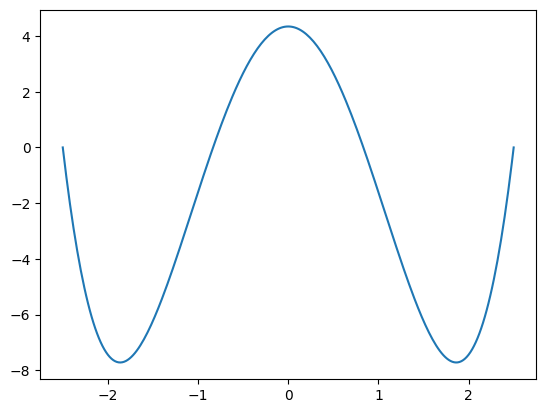

In [4]:
plt.plot(x1, phi_x(4))
print(phi_x(4)[-1])

In [5]:
Np = 12  #maximal sum of indices - 1
phi_indices = [] #0:0, 1:0, ..., 10:0 , 0:1, 1:1,
n = 2
m = 2 
while n + m < Np:
    # print(n, m)
    
    phi_indices.append((n, m))
    n += 1
    if (n + m == Np):
        n = 2
        m += 1

Nb = len(phi_indices) #длина базиса
print(Nb)

b_phi = []       #все базисные функции в одном массиве
b_d2_phi = []
for tup in phi_indices:
    b_phi.append(phi(tup))
    b_d2_phi.append(d2_phi(tup))


36


(2, 2) 0.0 0.0
(3, 2) 0.0 0.0
(4, 2) -5.329070518200751e-15 4.440892098500626e-15
(5, 2) 0.0 0.0
(6, 2) 0.0 0.0
(7, 2) 2.5146551507759796e-14 -1.3711254354120683e-14
(8, 2) -1.8696155734687636e-13 4.1744385725905886e-14
(9, 2) 0.0 0.0
(2, 3) 0.0 0.0
(3, 3) 0.0 0.0
(4, 3) -5.329070518200751e-15 4.440892098500626e-15
(5, 3) 0.0 0.0
(6, 3) 0.0 0.0
(7, 3) 2.5146551507759796e-14 -1.3711254354120683e-14
(8, 3) -1.8696155734687636e-13 4.1744385725905886e-14
(2, 4) 0.0 0.0
(3, 4) 0.0 0.0
(4, 4) -5.329070518200751e-15 4.440892098500626e-15
(5, 4) 0.0 0.0
(6, 4) 0.0 0.0
(7, 4) 2.5146551507759796e-14 -1.3711254354120683e-14
(2, 5) 0.0 0.0
(3, 5) 0.0 0.0
(4, 5) -5.329070518200751e-15 4.440892098500626e-15
(5, 5) 0.0 0.0
(6, 5) 0.0 0.0
(2, 6) 0.0 0.0
(3, 6) 0.0 0.0
(4, 6) -5.329070518200751e-15 4.440892098500626e-15
(5, 6) 0.0 0.0
(2, 7) 0.0 0.0
(3, 7) 0.0 0.0
(4, 7) -5.329070518200751e-15 4.440892098500626e-15
(2, 8) 0.0 0.0
(3, 8) 0.0 0.0
(2, 9) 0.0 0.0
11 56


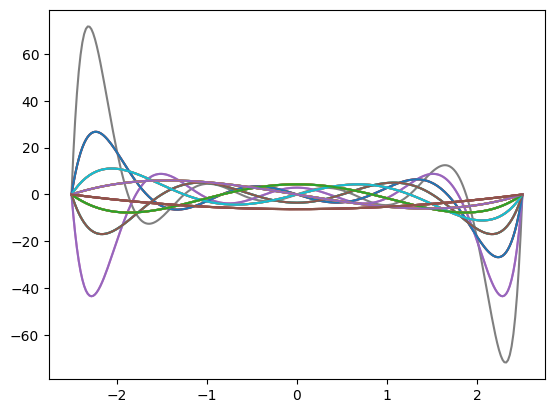

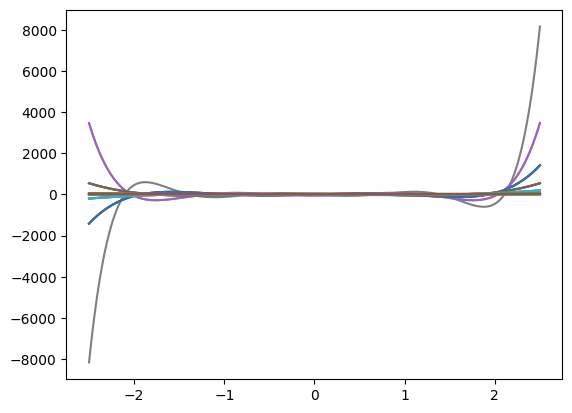

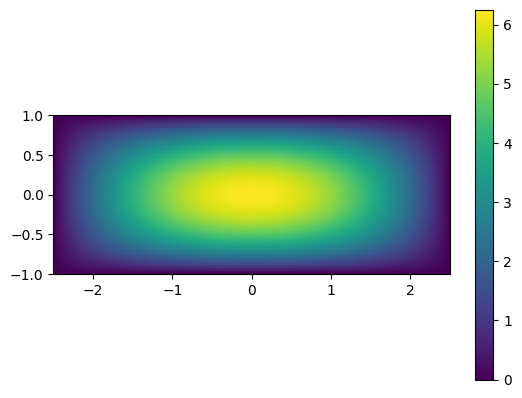

In [6]:
fig, ax = plt.subplots()
for item in phi_indices:
    plt.plot(x1, phi_x(item[0]))
    print(item, phi_x(item[0])[0], phi_x(item[0])[-1])
    # plt.plot(y1, phi_y(item[1]), 'b')
    pass

fig, ax = plt.subplots()
for item in phi_indices:
    plt.plot(x1, d2_phi_x(item[0]))
    # plt.plot(y1, d2_phi_y(item[1]), 'b')
    pass

def num(n):
    if n%2 != 0:
        return int(3/8 * n**2 + n - 3/8 )
        # return int(3/8 * n**2 + 3/2*n + 1/8 )
    else:
        return int(3/8 * n**2 + 5/4 * n)

print(Np - 1, num(Np-1))
perfect_N = num(Np-1)
perfect_N = 0
fig, ax = plt.subplots()
plt.imshow(b_phi[perfect_N],  extent=[-x_size/2, +x_size/2, -y_size/2, +y_size/2], interpolation='none')
plt.colorbar()
# fig, ax = plt.subplots()
# plt.imshow(b_d2_phi[perfect_N],  extent=[-x_size/2, +x_size/2, -y_size/2, +y_size/2], interpolation='none')
# plt.colorbar()

# print(b_phi[150])


In [7]:
left_side_matrix = np.zeros((Nb, Nb))  #<phi_i, L phi_j>
right_side_matrix = np.zeros((Nb, Nb)) #<phi_i, phi_j>

ax = 1
ay = 2
k0 = (ax * 2 * np.pi /x_size) ** 2 + (ay * 2 * np.pi /y_size) ** 2
try:
    for i in range(0, Nb):
        for j in range(0, Nb):
            z_left = b_phi[i] * (b_d2_phi[j] + k0**2 * b_phi[j]) # Lphi_j = (d2 + k0**2) phi_j
            z_right = b_phi[i] * b_phi[j] # shape is correct, b_phi is an (Ny, Nx) matrix
            
            
            left_side_matrix[i][j] = c_t([c_t( z_left_x, x1 )[-1] for z_left_x in z_left], y1)[-1]
            right_side_matrix[i][j] = c_t([c_t( z_right_x, x1 )[-1] for z_right_x in z_right], y1)[-1]
        
except Exception as e:
    print(e.args)
print('Matrices ready')
        
try:
    
    eigs_raw, vectors_raw = scipy.linalg.eig( a = left_side_matrix, b = right_side_matrix, right=True, left = False)  
    #Ax = lBx - right eigenvector - returned by default
    #yA = lBy - left eigenvector

except Exception as e:
    print(e.args)

Matrices ready


In [8]:
l0 = 2 * np.pi / k0
print(y_size/l0)

13.06902543893354


In [9]:
eigs  = []
vectors = []

print(eigs_raw.shape, vectors_raw.shape)

for i, eig in enumerate(eigs_raw):
    # if eig.imag == 0 and (np.abs(np.sqrt(eig.real) - k0) < 10): 
    try:       
        if eig.imag == 0 and (k0**2 - eig.real) > 0:          
            eigs.append(eig)
            vectors.append(vectors_raw[:, i]) #eigenvector matrix  - must take columns not rows
           
    except Exception as e:
        print(e.args, i, eig)

print(len(eigs)) #как провести отбор лямбд?

(36,) (36, 36)
36


In [10]:
answer = np.zeros((len(eigs), Ny, Nx))
print(Nb)
for i in range(len(eigs)):
    # print(lmbdas[i])
    for j in range(Nb):
        try:
            answer[i] = answer[i] +  vectors[i][j] * b_phi[j] 
        except Exception as e:
            print(e.args)

36


k0 = 41.05755430853173, k = (38.344639192448305+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.16386085355099686+0j)


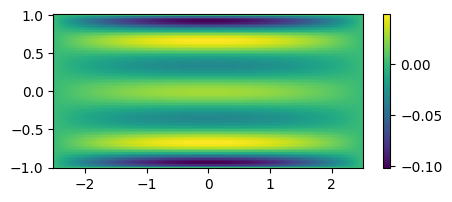

k0 = 41.05755430853173, k = (37.03476623378503+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.16965640521439934+0j)


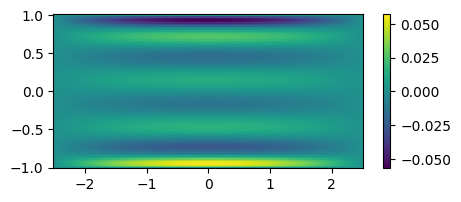

k0 = 41.05755430853173, k = (38.32793618074957+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.16393226281605408+0j)


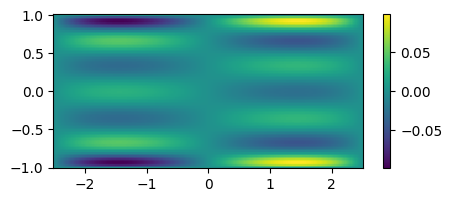

k0 = 41.05755430853173, k = (39.93157520437204+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15734879666083523+0j)


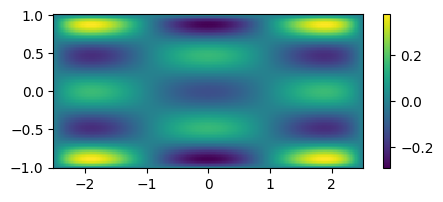

k0 = 41.05755430853173, k = (39.25371006198914+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.16006602426260425+0j)


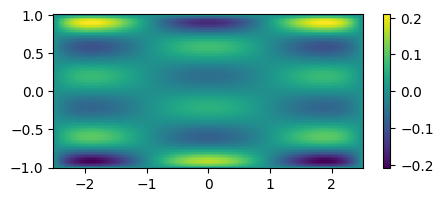

k0 = 41.05755430853173, k = (39.28433144079704+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15994125588336872+0j)


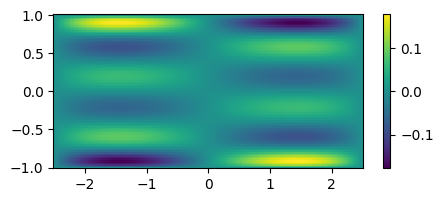

k0 = 41.05755430853173, k = (40.269878043409584+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15602692663748627+0j)


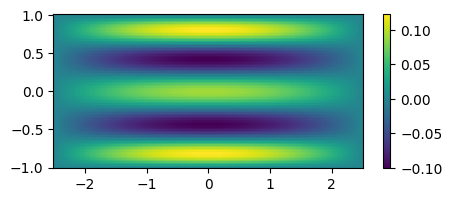

k0 = 41.05755430853173, k = (39.88834009235751+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.1575193475745416+0j)


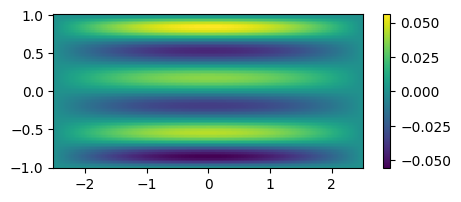

k0 = 41.05755430853173, k = (39.88305470048589+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15754022239181792+0j)


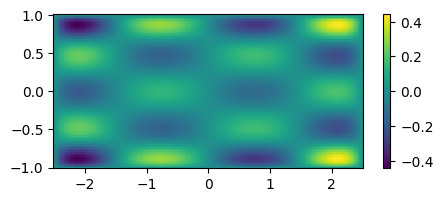

k0 = 41.05755430853173, k = (41.02268373120798+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.153163682521328+0j)


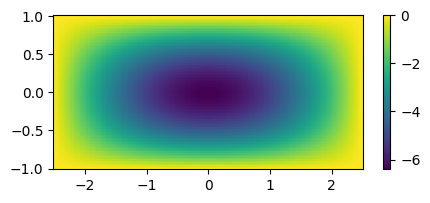

k0 = 41.05755430853173, k = (40.254193693525885+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15608771982905514+0j)


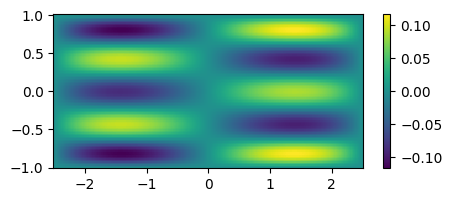

k0 = 41.05755430853173, k = (40.27380540034917+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15601171145166015+0j)


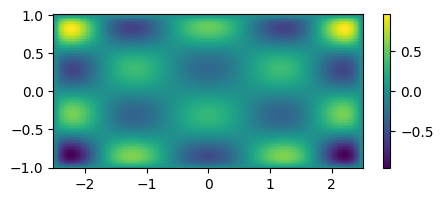

k0 = 41.05755430853173, k = (40.98416969374004+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15330761496771972+0j)


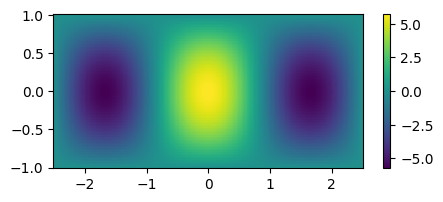

k0 = 41.05755430853173, k = (40.34615865158915+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15573193377437197+0j)


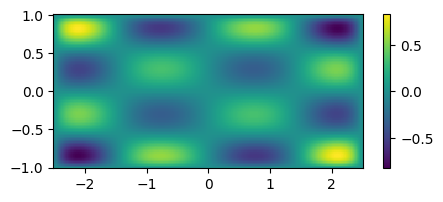

k0 = 41.05755430853173, k = (40.39253410287388+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.1555531349228358+0j)


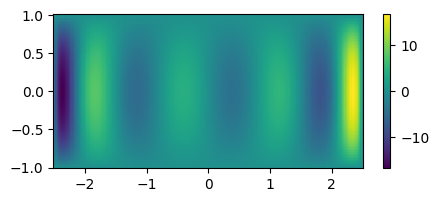

k0 = 41.05755430853173, k = (40.59864715610081+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15476341571237315+0j)


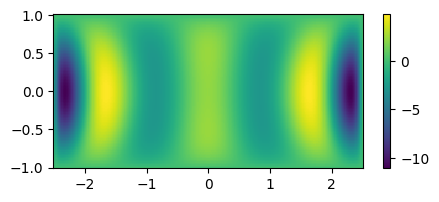

k0 = 41.05755430853173, k = (40.57463734048582+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15485499610147235+0j)


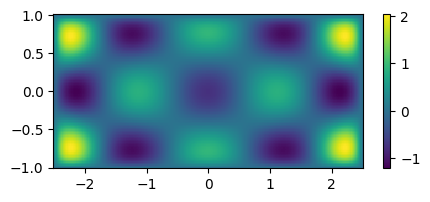

k0 = 41.05755430853173, k = (40.739612054344576+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15422791210672637+0j)


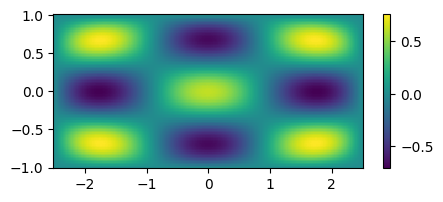

k0 = 41.05755430853173, k = (40.78138828328107+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.1540699218853094+0j)


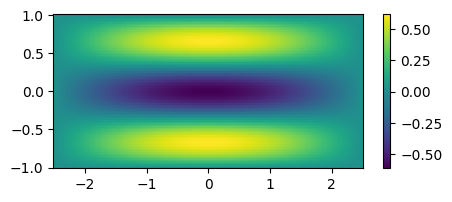

k0 = 41.05755430853173, k = (41.008245852333665+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15321760725403052+0j)


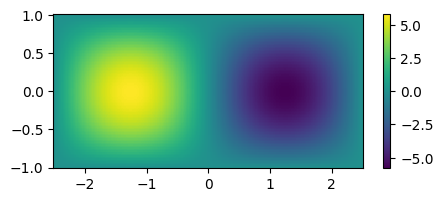

k0 = 41.05755430853173, k = (40.90315816476967+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15361125128453676+0j)


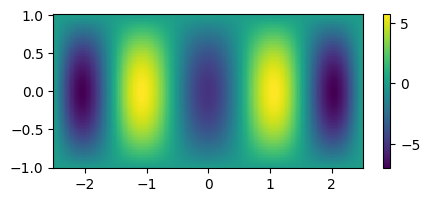

k0 = 41.05755430853173, k = (40.47031148769018+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15525418698817617+0j)


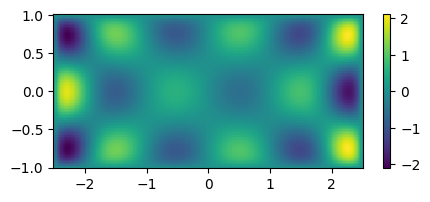

k0 = 41.05755430853173, k = (40.50177073808098+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.1551335952151827+0j)


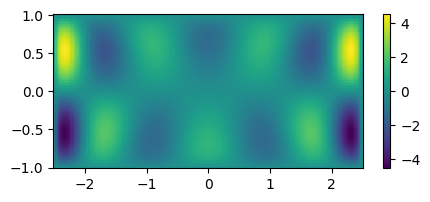

k0 = 41.05755430853173, k = (40.519876245866726+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15506427682686988+0j)


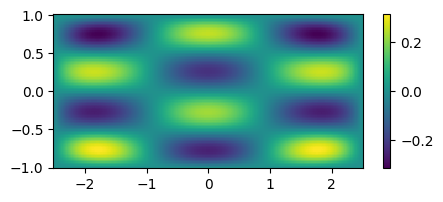

k0 = 41.05755430853173, k = (40.5470013840456+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15496054190709868+0j)


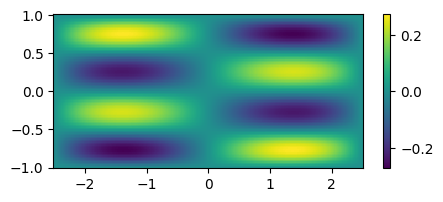

k0 = 41.05755430853173, k = (40.569021491161216+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15487643221931063+0j)


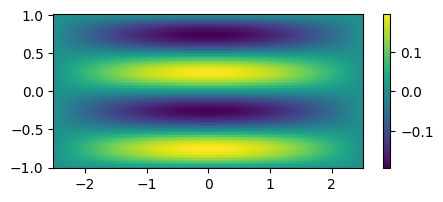

k0 = 41.05755430853173, k = (40.65155739012724+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.1545619826291216+0j)


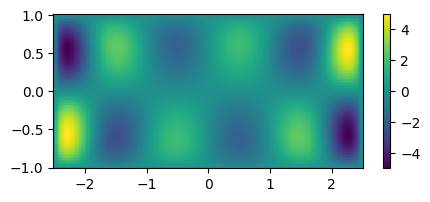

k0 = 41.05755430853173, k = (40.70254347488924+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.1543683703957197+0j)


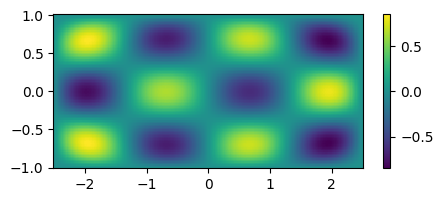

k0 = 41.05755430853173, k = (40.950421317542194+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15343396001857537+0j)


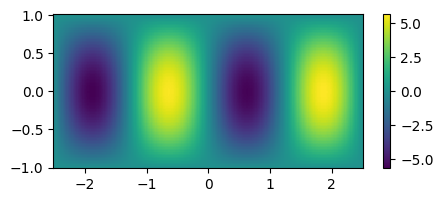

k0 = 41.05755430853173, k = (40.932363396651574+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.1535016496920277+0j)


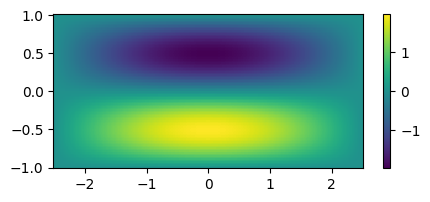

k0 = 41.05755430853173, k = (40.9178924348893+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15355593686008437+0j)


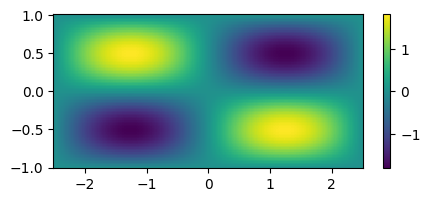

k0 = 41.05755430853173, k = (40.89375240561598+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.153646582608954+0j)


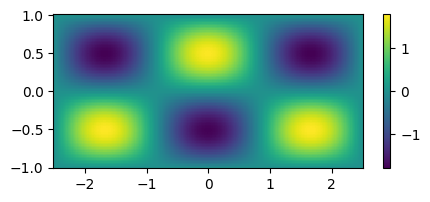

k0 = 41.05755430853173, k = (40.766844310959314+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15412488784397968+0j)


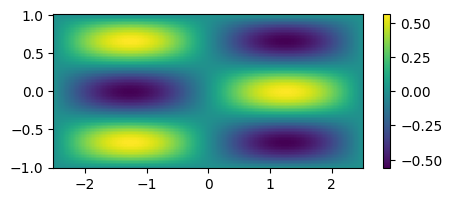

k0 = 41.05755430853173, k = (40.81090776250797+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15395847952570663+0j)


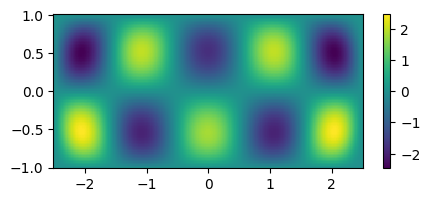

k0 = 41.05755430853173, k = (40.84336344432928+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15383613829315884+0j)


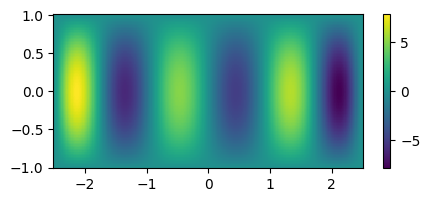

k0 = 41.05755430853173, k = (40.85788166711111+0j) ,lmbda0 = 0.15303359912682243 lmbda = (0.15378147497640066+0j)


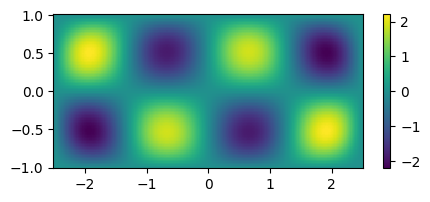

In [11]:
n = 0

# for i in range(n, n+1): 
for i in range(0, len(eigs)): 
    print(f'k0 = {k0}, k = {np.sqrt(eigs[i])} ,lmbda0 = {l0} lmbda = {2 * np.pi / np.sqrt(eigs[i])}')  
    plt.figure('HelmHoltz' + str(i),figsize=[5, 2], clear=True)
    plt.pcolor(x, y, answer[i])
    plt.colorbar()
    plt.show()
